### CONTEXTO:
Uma empresa do ramo alimentício tem mais de 20 mil colaboradores em todo o Brasil. Com o passar dos anos a empresa percebeu um aumento no custo do plano de saúde com seus colaboradores. Como forma de entender esse comportamento, a gerência de Benefícios e Bem Estar da Diretoria de Pessoas conduziu uma pesquisa interna com um grupo de 1.338 colaboradores sorteados aleatoriamente.

 

A gerência acredita que fatores como fumo e obesidade podem estar relacionados com o maior uso do plano de saúde, o que acaba elevando os custos. Portanto, os colaboradores da pesquisa responderam características pessoais como o Índice de Massa Corpórea (IMC), Qte de Filhos e se fazem uso de cigarros.

 

Com base nessas informações, pede-se:
1.     Quais fatores estão mais relacionados com o Custo do Plano de Saúde na empresa?
2.     Que tipo de ações preventivas a empresa pode fazer de forma a diminuir esse custo?

### Carregamento de pacote

In [1]:
# Pacotes de malipulação de dados
import pandas as pd
import numpy as np

# Pacotes para modelagem
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

# Pacotes Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9

# Módulo de Análise Exploratória
import aed
from ydata_profiling import ProfileReport

C:\Users\tania\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
C:\Users\tania\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.


### Carregamento bando de dados

In [28]:
df = pd.read_excel("base_plano_de_saude.xlsx", sheet_name=1)

### Ajuste do banco de dados

In [11]:
df.columns

Index(['Idade', 'Sexo', 'IMC', 'Qte_Filhos', 'Fumante', 'Região',
       'Custo_Saude'],
      dtype='object')

### Analise exploratoria 

COM ANALISE EXPLORATORIA FEITA OBSERVAMOS QUE

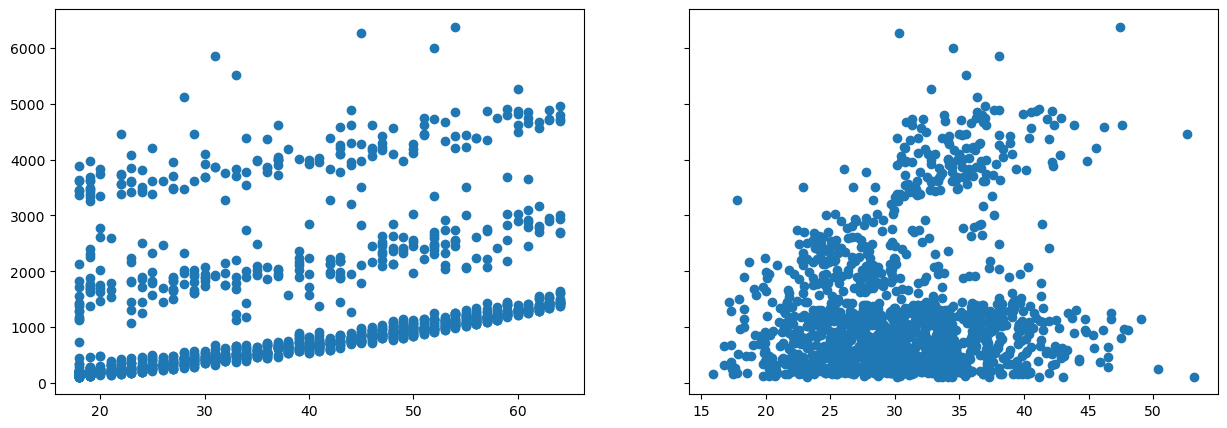

In [20]:
fig, ((ax1,ax2)) = plt.subplots(1,2,sharey=True,figsize=(15,5))
ax1.scatter(df['Idade'],df['Custo_Saude']);
ax2.scatter(df['IMC'],df['Custo_Saude']);


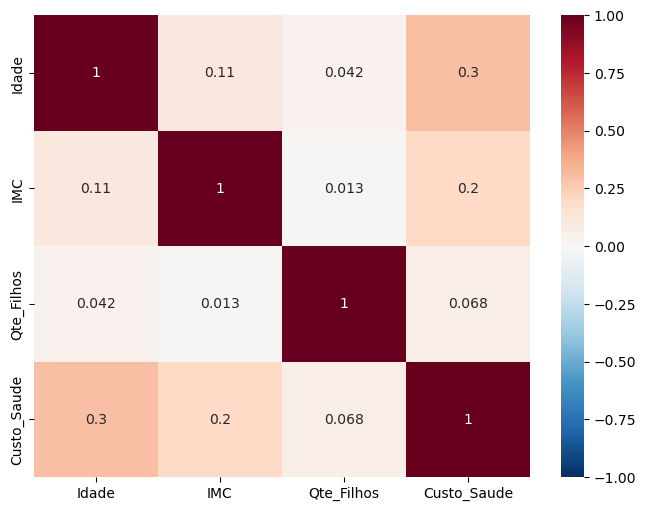

In [23]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),
            cmap='RdBu_r',
            vmin=-1, vmax=1,
            annot=True);

In [29]:
Relatorio = ProfileReport(df, title="Relatório Plano de saude")
Relatorio

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Analise de regressão mulltipla

Podemos observar a partir do modelo gerado que as variaveis "fumante, IMC, idade e quantidade de filhos foram significativas para predizer a variavel custo de saude. A variavel que mais explica a variação do custo de saude é a variavel fumante, seguida de quantidade de filhos, imc e por fim idade. sendo que ser fummante acarreta em um aumento de 2381 reais na variavel custo de saude.

#### Preparação dos dados para modelagem

In [ ]:
#teste de normalidade para a variavel resposta


In [23]:
from sklearn.preprocessing import LabelEncoder

# Criação de uma instância do LabelEncoder
le = LabelEncoder()

# Transformação da variável 'regiao' usando o LabelEncoder
df['Regiao_encoded'] = le.fit_transform(df['Região'])
df['Sexo_encoded'] = le.fit_transform(df['Sexo'])
df['Fumante_encoded'] = le.fit_transform(df['Fumante'])

del df["Sexo"]
del df["Fumante"]
del df["Unnamed: 7"]
del df["Unnamed: 8"]
del df["Unnamed: 9"]

# Exibição do DataFrame atualizado
print(df)

      Idade     IMC  Qte_Filhos    Região  Custo_Saude  Regiao_encoded  \
0        19  27.900           0    Centro  1688.492400               0   
1        18  33.770           1   Sudeste   172.555230               3   
2        28  33.000           3   Sudeste   444.946200               3   
3        33  22.705           0     Norte  2198.447061               2   
4        32  28.880           0     Norte   386.685520               2   
...     ...     ...         ...       ...          ...             ...   
1333     50  30.970           3     Norte  1060.054830               2   
1334     18  31.920           0  Nordeste   220.598080               1   
1335     18  36.850           0   Sudeste   162.983350               3   
1336     21  25.800           0    Centro   200.794500               0   
1337     61  29.070           0     Norte  2914.136030               2   

      Sexo_encoded  Fumante_encoded  
0                0                1  
1                1                0

In [16]:
df.columns

Index(['Idade', 'IMC', 'Qte_Filhos', 'Região', 'Custo_Saude', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Regiao_encoded', 'Sexo_encoded',
       'Fumante_encoded'],
      dtype='object')

In [24]:
y = df['Custo_Saude']

# Variáveis explicativas
df['intercepto'] = 1 

x = df[['intercepto',
         'Regiao_encoded',
         'Sexo_encoded',
         'Fumante_encoded',
         'IMC','Idade','Qte_Filhos']]

#### Ajuste do modelo

In [25]:

modelo = sm.OLS(y , x)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:            Custo_Saude   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     664.6
Date:                Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:37:55   Log-Likelihood:                -10470.
No. Observations:                1338   AIC:                         2.095e+04
Df Residuals:                    1331   BIC:                         2.099e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercepto      -1201.4516     95.694    -

In [26]:
y = df['Custo_Saude']

# Variáveis explicativas
df['intercepto'] = 1 

x = df[['intercepto',
         'Fumante_encoded',
         'IMC','Idade','Qte_Filhos']]

modelo = sm.OLS(y , x)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:            Custo_Saude   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:38:09   Log-Likelihood:                -10470.
No. Observations:                1338   AIC:                         2.095e+04
Df Residuals:                    1333   BIC:                         2.098e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercepto      -1210.2769     94.198    -

### CONCLUSÃO

O conselho preventivo para a diminuição do custo de saude para a empresa é principalmente fazer uma campanha antitabagista e focar em contratar empregados que não possuem histórico de tabagismo pois ele impacta excessivamente os custos de plano de saúde, como visto no modelo estatistico. E em segundo foco, pessoas mais jovens e sem filhos também possuem menores valores de gastos com planos de saúde.  
